# UniqueAI夏令营第一周任务

## 前置任务

wsl, git,miniconda的配置

<img src="前置任务截屏.png" alt="配置截屏" style="zoom:25%;" />

In [186]:
# 导入所需要的工具包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [187]:
# 导入数据
data=pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 数据处理

### 1.缺失值处理

In [188]:
# 看看缺失值
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

由此看出只有**Age,Cabin,Embarked**有缺失值

我们删去**PassengerId**，**Name**，**Ticket**，**Cabin**这些不重要的列

In [189]:
# 删除指定的列
data_dropped = data.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])
data_dropped.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q


#### 均值填补Age
我们选取均值来填补Age的缺失值

In [190]:
# 使用均值填补年龄列的缺失值
data_dropped['Age'].fillna(data_dropped['Age'].mean(), inplace=True)

In [191]:
data_dropped.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [192]:
data_dropped.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q


#### 众数填补Embarked

In [193]:
mode_value = data_dropped['Embarked'].mode()[0]
data_dropped['Embarked'].fillna(mode_value, inplace=True)

In [194]:
data_dropped.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 2.将数据标准化，归一化

将Age和Fare列的数据**标准化**

In [195]:
# 提取需要标准化的列
columns_to_standardize =data_dropped[['Age','Fare']]
print(columns_to_standardize)

           Age     Fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns]


In [196]:
#创建StandardScaler 对象
scaler_stan = StandardScaler()
#将数据进行标准化
data_Standardized=scaler_stan.fit_transform(columns_to_standardize) 
#转换回DataFrame类型
data_Standardized=pd.DataFrame(data_scaled,columns=columns_to_standardize.columns) 
print(data_Standardized)

          Age      Fare
0   -0.592481 -0.502445
1    0.638789  0.786845
2   -0.284663 -0.488854
3    0.407926  0.420730
4    0.407926 -0.486337
..        ...       ...
886 -0.207709 -0.386671
887 -0.823344 -0.044381
888  0.000000 -0.176263
889 -0.284663 -0.044381
890  0.177063 -0.492378

[891 rows x 2 columns]


将Age和Fare的数据**归一化**

In [197]:
# 对数据进行归一化
# 创建MinMaxScaler对象
scaler_nor = MinMaxScaler()
# 对Age和Fare列进行归一化
data_normalized = scaler_nor.fit_transform(data_dropped[['Age', 'Fare']])
# 将归一化后的数据转换回DataFrame类型
data_normalized = pd.DataFrame(data_normalized, columns=['Age', 'Fare'])
print(data_normalized)

          Age      Fare
0    0.271174  0.014151
1    0.472229  0.139136
2    0.321438  0.015469
3    0.434531  0.103644
4    0.434531  0.015713
..        ...       ...
886  0.334004  0.025374
887  0.233476  0.058556
888  0.367921  0.045771
889  0.321438  0.058556
890  0.396833  0.015127

[891 rows x 2 columns]


因为后面涉及逻辑回归的拟合，我们选取标准化数据作为**Age**和**Fare**这两列数据处理的结果

In [198]:
data_dropped[['Age','Fare']]=data_Standardized
print(data_dropped)

     Survived  Pclass     Sex       Age  SibSp  Parch      Fare Embarked
0           0       3    male -0.592481      1      0 -0.502445        S
1           1       1  female  0.638789      1      0  0.786845        C
2           1       3  female -0.284663      0      0 -0.488854        S
3           1       1  female  0.407926      1      0  0.420730        S
4           0       3    male  0.407926      0      0 -0.486337        S
..        ...     ...     ...       ...    ...    ...       ...      ...
886         0       2    male -0.207709      0      0 -0.386671        S
887         1       1  female -0.823344      0      0 -0.044381        S
888         0       3  female  0.000000      1      2 -0.176263        S
889         1       1    male -0.284663      0      0 -0.044381        C
890         0       3    male  0.177063      0      0 -0.492378        Q

[891 rows x 8 columns]


### 3.对于离散型变量的OneHotEncoder。

In [199]:
#使用 pandas 库中的 get_dummies
data_encoded = pd.get_dummies(data_dropped, columns=['Sex','Embarked'])
print(data_encoded)

     Survived  Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0           0       3 -0.592481      1      0 -0.502445           0         1   
1           1       1  0.638789      1      0  0.786845           1         0   
2           1       3 -0.284663      0      0 -0.488854           1         0   
3           1       1  0.407926      1      0  0.420730           1         0   
4           0       3  0.407926      0      0 -0.486337           0         1   
..        ...     ...       ...    ...    ...       ...         ...       ...   
886         0       2 -0.207709      0      0 -0.386671           0         1   
887         1       1 -0.823344      0      0 -0.044381           1         0   
888         0       3  0.000000      1      2 -0.176263           1         0   
889         1       1 -0.284663      0      0 -0.044381           0         1   
890         0       3  0.177063      0      0 -0.492378           0         1   

     Embarked_C  Embarked_Q

In [200]:
data=data_encoded

## 机器学习

### 逻辑回归
在下面的代码中会用到逻辑回归的损失函数为

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right]$$

其中：
- $ m $ 是样本数量
- $ y_i $ 是第 $ i $ 个样本的真实标签
- $ h_\theta(x_i)  $是第$i $ 个样本的预测值，即 $ h_\theta(x_i) = \sigma(\theta^T x_i) $
- $ \sigma(z) $ 是逻辑函数( sigmoid 函数)，定义为 $ \sigma(z) = \frac{1}{1 + e^{-z}} $


In [201]:
X=data.drop(columns=['Survived'])
y = data['Survived']
print(X)
print(y)

     Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0         3 -0.592481      1      0 -0.502445           0         1   
1         1  0.638789      1      0  0.786845           1         0   
2         3 -0.284663      0      0 -0.488854           1         0   
3         1  0.407926      1      0  0.420730           1         0   
4         3  0.407926      0      0 -0.486337           0         1   
..      ...       ...    ...    ...       ...         ...       ...   
886       2 -0.207709      0      0 -0.386671           0         1   
887       1 -0.823344      0      0 -0.044381           1         0   
888       3  0.000000      1      2 -0.176263           1         0   
889       1 -0.284663      0      0 -0.044381           0         1   
890       3  0.177063      0      0 -0.492378           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2             0      

In [202]:
#定义划分训练集和测试集的函数
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state) #保证特定的random_state有特定的划分，不同的random_state划分不同
    indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

# 调用函数。将1/4的数据设为测试集，剩余3/4为训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)

     Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
372       3 -0.823344      0      0 -0.486337           0         1   
140       3  0.000000      0      2 -0.341452           1         0   
439       2  0.100109      0      0 -0.437007           0         1   
817       2  0.100109      1      1  0.096646           0         1   
378       3 -0.746389      0      0 -0.567631           0         1   
..      ...       ...    ...    ...       ...         ...       ...   
835       1  0.715743      1      1  1.025945           1         0   
192       3 -0.823344      1      0 -0.490280           1         0   
629       3  0.000000      0      0 -0.492714           0         1   
559       3  0.484880      1      0 -0.298078           1         0   
684       2  2.331785      1      1  0.136831           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
372           0           0           1  
140           1           0           0  
439           0      

In [203]:
#添加截距,给X_train和X_test的左边添加一列"1"
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

初始化参数，再这里将其全部设置为0。

In [204]:
# 初始化参数
theta = np.zeros(X_train.shape[1])

In [205]:
# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# 定义损失函数，衡量模型是否准确
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5  # 用小量避免log(0)的出现
    cost = -1/m * (y.dot(np.log(h + epsilon)) + (1 - y).dot(np.log(1 - h + epsilon)))
    return cost

通过对每个变量求偏导，经过推导可以得出梯度的表达式$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ h_\theta(x_i) - y_i \right] x_{ij} 
$$，写成向量的形式为$$ 
\nabla J(\theta) = \frac{1}{m} X^T (h_\theta(X) - y) 
$$

In [206]:
# 使用梯度下降算法，不断更新参数theta
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        gradient = 1/m * X.T.dot(sigmoid(X.dot(theta)) - y)
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history


In [207]:
# 设置超参数(hyperparameters)即学习率和迭代次数,将迭代次数设置为10000
learning_rate = 0.01
num_iterations = 10000

In [208]:
# 训练模型
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

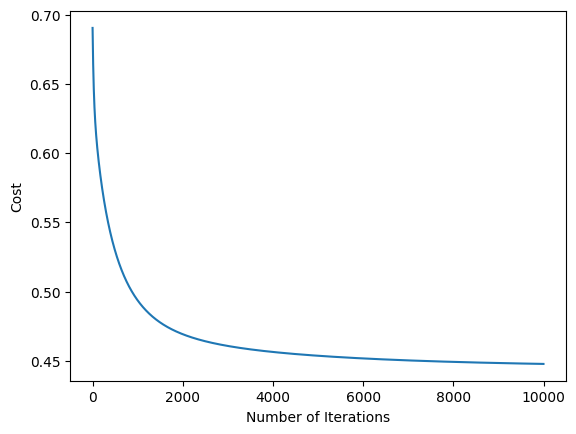

In [209]:
# 绘制损失函数随迭代次数变化的图像
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
#plt.title('Cost Function History')
plt.show()

In [210]:
print(cost_history)

[0.69058057 0.68812448 0.68575513 ... 0.44768512 0.44768456 0.44768399]


In [211]:
# 定义预测函数，当逻辑函数的值大于等于0.5认为存活，小于0.5认为不存活
def predict(X, theta):
    return sigmoid(X.dot(theta)) >= 0.5

我们利用测试集计算一下准确率

In [212]:
# 预测的y值
y_pred = predict(X_test, theta)
# y值预测准确则accuracy为1，预测不准确accuracy为0
accuracy = np.mean(y_pred == y_test)
#输出预测正确的样本数占总样本数的比例
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.21%


*由于这周大多数时间都在外地进行实践所以没有来得及进阶任务的学习和完成，在后面的时间会进行补充*